EDA (Exploratory Data Analysis) is the process of summarizing and visualizing data to understand its patterns, detect anomalies, and generate insights. It involves:

Inspecting data structure, types, and missing values.
Computing summary statistics (mean, median, etc.).
Visualizing data with plots (histograms, boxplots, etc.).
Identifying outliers and correlations.

Step 1:  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")

Import libraries for data handling (pandas, numpy) and visualization (matplotlib, seaborn).
These libraries enable data manipulation, plotting, and statistical exploration.

Step 2: Load the Data

In [3]:
from google.colab import files
import pandas as pd

# Automatically upload files
uploaded = files.upload()

# Once files are uploaded, you can load them
train_df = pd.read_excel('train_data.xlsx')
test_df = pd.read_excel('test_data.xlsx')

# Display the first few rows of the datasets
print("Train Data:")
print(train_df.head())

print("Test Data:")
print(test_df.head())


Saving test_data.xlsx to test_data (1).xlsx
Saving train_data.xlsx to train_data (1).xlsx
Train Data:
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

  

Load the datasets into pandas DataFrames.
The train_data.xlsx contains historical data for model training, and test_data.xlsx is used for validation.

Step 3: Display basic information of Dataset

In [5]:
# Check basic information for train and test datasets
print("Training Data Info:")
train_df.info()

print("\nTest Data Info:")
test_df.info()


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       

Understand the structure of the training dataset.
Displays column names, data types, and non-null counts to check for missing values.

Missing Values in Training Data:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


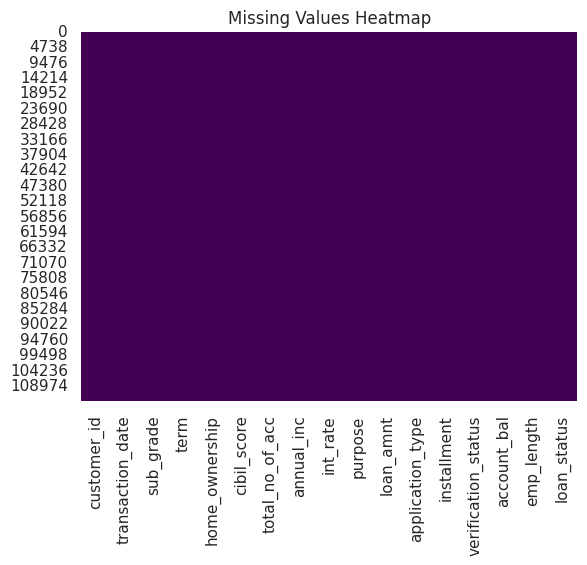

In [6]:
missing_values = train_df.isnull().sum()
print("Missing Values in Training Data:")
print(missing_values)

# Visualize missing values
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Identify missing data patterns.
Columns with many missing values may require imputation or removal.
The heatmap visualizes the missing values in the train data.
Missing values (True) are typically displayed in brighter colors (like yellow), while non-missing values (False) are shown in darker colors (like purple).
This is a crucial step, as missing data can lead to biased or incomplete analysis.
Common strategies to handle missing values include imputation (mean, median, or mode) or removal.

In [7]:
print("Summary Statistics:")
train_df.describe()

Summary Statistics:


,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,1.137050e+05,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,4.359137e+07,2015-03-04 22:24:20.769535232,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895
min,3.630090e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2.509597e+07,2014-08-01 00:00:00,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,4.504932e+07,2015-04-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,6.134344e+07,2015-10-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,7.615383e+07,2016-03-01 00:00:00,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000
std,2.016104e+07,NaN,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239


Analyze numerical data distributions (mean, std deviation, etc.).
Highlights outliers and ranges for numerical features.Summary statistics give us insights into the central tendency (mean, median)
and spread (standard deviation, min, max, etc.) of the numerical features in the data.
This is helpful for detecting outliers, understanding the range of data, and assessing data distributions.
For example, if the mean is much larger than the median, the data might be right-skewed.


Step 4: Univariate Analysis
1. Analyze Categorical Variables

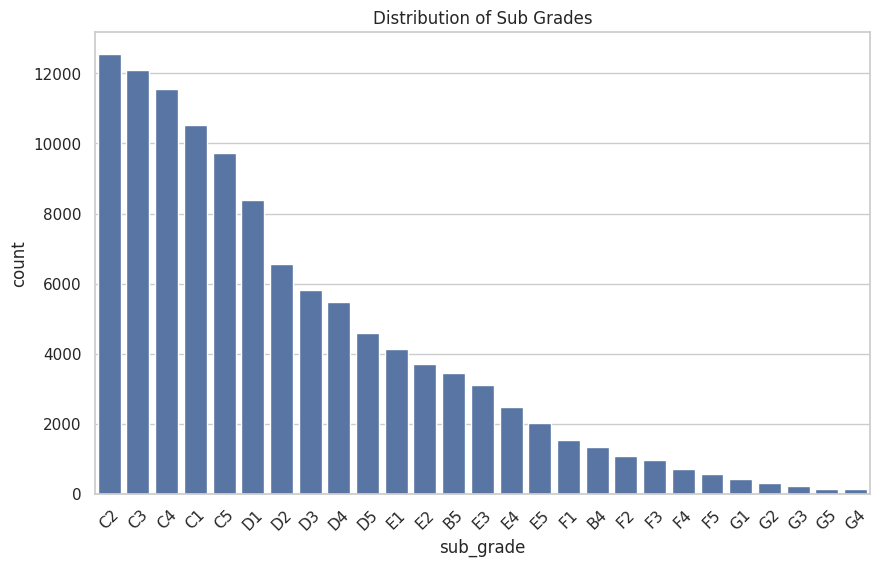

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='sub_grade', order=train_df['sub_grade'].value_counts().index)
plt.title("Distribution of Sub Grades")
plt.xticks(rotation=45)
plt.show()


Visualize the frequency of each sub_grade.
Identifies the most and least common sub-grades.

2. Analyze Numerical Variables


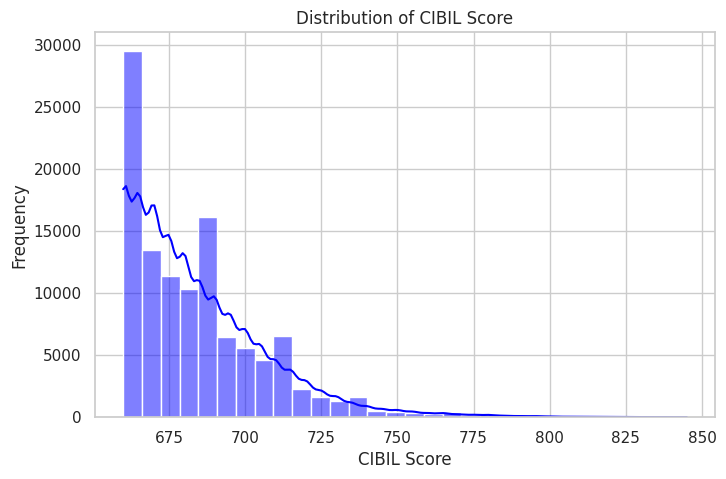

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['cibil_score'], kde=True, bins=30, color='blue')
plt.title("Distribution of CIBIL Score")
plt.xlabel("CIBIL Score")
plt.ylabel("Frequency")
plt.show()


Explore the distribution of cibil_score.
Highlights central tendency and possible skewness in scores.

Step 5: Bivariate Analysis
1. Categorical vs Target (Loan Status):

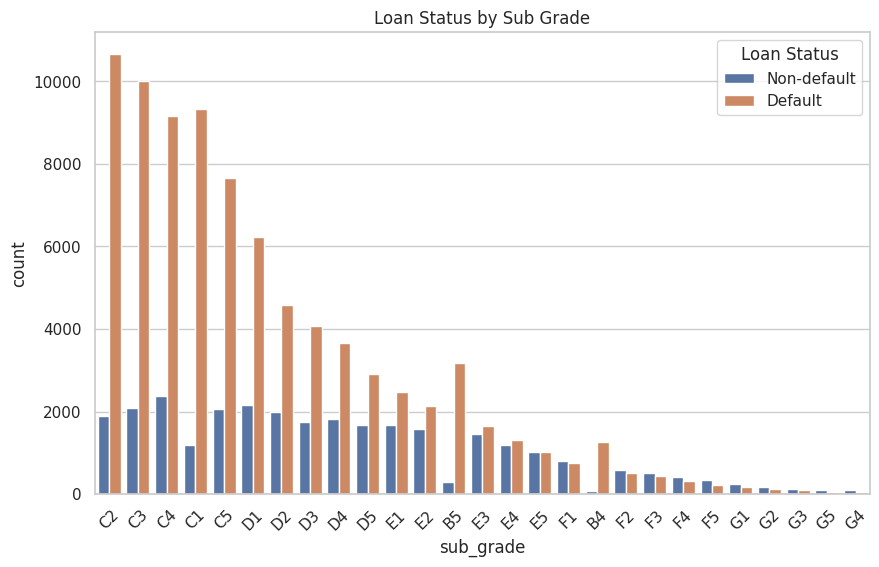

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='sub_grade', hue='loan_status', order=train_df['sub_grade'].value_counts().index)
plt.title("Loan Status by Sub Grade")
plt.legend(title="Loan Status", labels=["Non-default", "Default"])
plt.xticks(rotation=45)
plt.show()


Compare default and non-default rates across sub-grades.
Some sub-grades may have a higher risk of default.

2. Numerical vs Target (Loan Status):


<ipython-input-11-0084fd85fd3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='loan_status', y='cibil_score', palette='Set2')


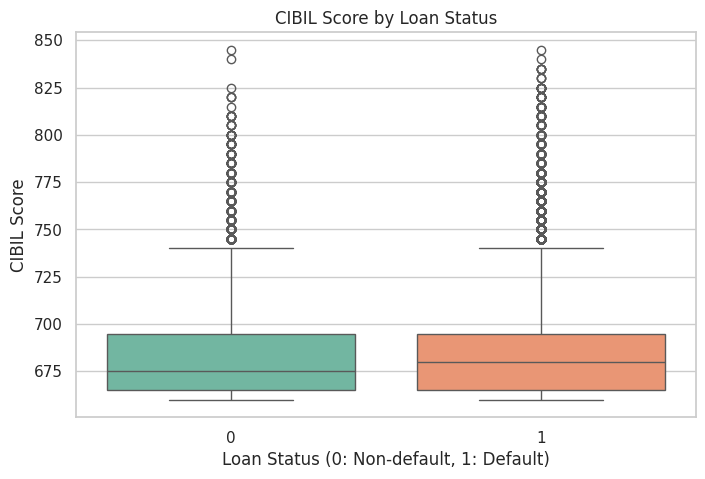

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='loan_status', y='cibil_score', palette='Set2')
plt.title("CIBIL Score by Loan Status")
plt.xlabel("Loan Status (0: Non-default, 1: Default)")
plt.ylabel("CIBIL Score")
plt.show()


Analyze how cibil_score varies with loan_status.
Higher scores are associated with fewer defaults.

Step 6: Correlation Analysis

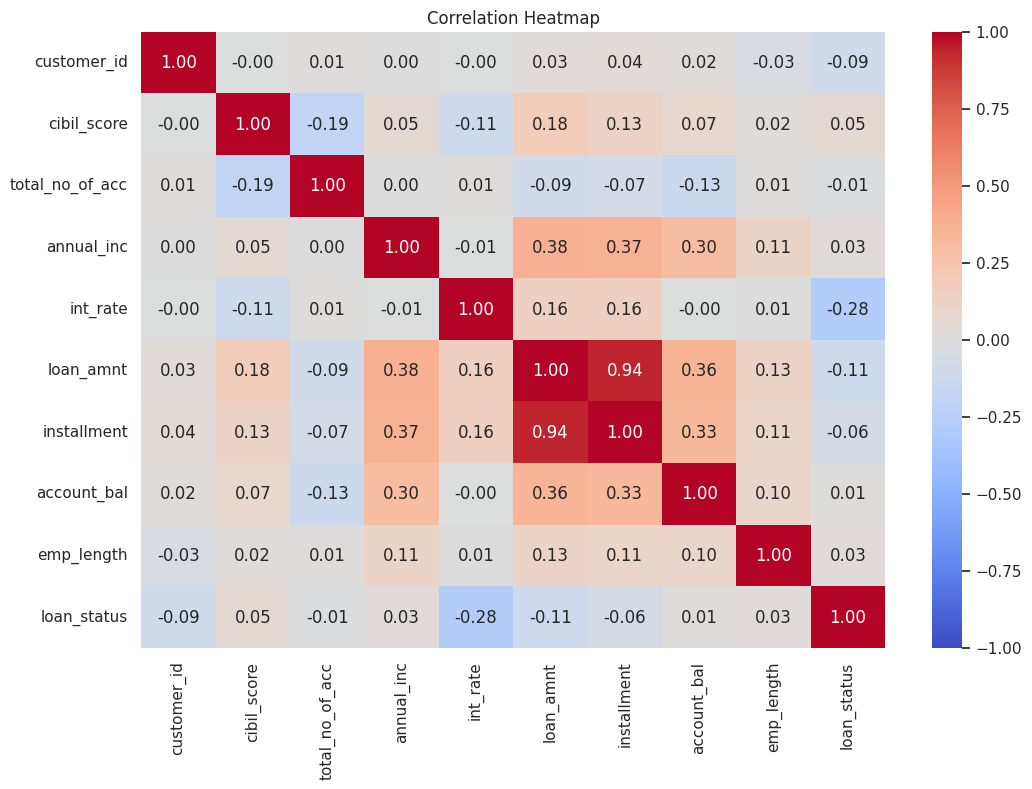

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Understand relationships between numerical features.
Features with strong correlation to loan_status are likely significant for predictions.The correlation heatmap displays the relationships between numerical features.
Strong correlations (either positive or negative) can provide insights into which features may be important for prediction.
Features that are highly correlated (above 0.8 or below -0.8) may introduce multicollinearity in the model.
In such cases, one of the correlated features might need to be dropped to avoid overfitting.


Step 7: Outlier Detection

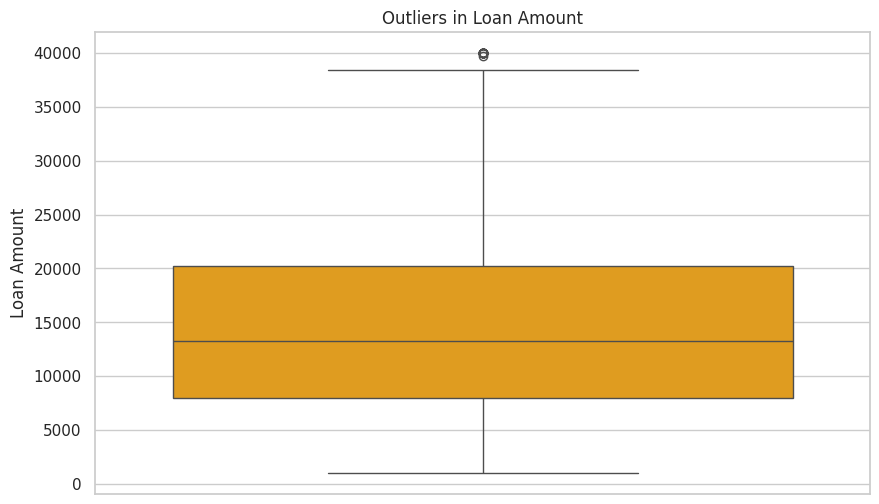

In [19]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a box plot for the 'loan_amnt' feature to visualize outliers
sns.boxplot(data=train_df, y='loan_amnt', color='orange')

# Add a title to the plot
plt.title("Outliers in Loan Amount")

# Label the y-axis
plt.ylabel("Loan Amount")

# Display the plot
plt.show()

Detect extreme values in loan amount.
Outliers may need capping or removal to prevent skewed model performance. Outliers are represented by the points outside the whiskers of the box plot.
Extreme values may indicate issues with data entry or may represent rare but valid cases.
Depending on the context, outliers may be removed, transformed, or kept in the dataset.

Observations for Each Visualization:

Missing Values Heatmap: Identifies missing data, which needs imputation or removal to prevent model bias.

Summary Statistics: Provides data distribution insights, highlighting potential skewness or outliers.

Sub-grade Distribution (Bar Plot): Shows sub_grade frequency, helping identify data imbalances.

CIBIL Score Distribution (Histogram): Reveals score distribution, indicating if transformation is needed.

Loan Status by Sub-grade (Bar Plot): Shows sub_grade's relationship with loan status, indicating its predictive value.

CIBIL Score by Loan Status (Box Plot): Compares score distributions, highlighting CIBIL score's importance for defaults.

Correlation Heatmap: Displays correlations, identifying multicollinearity that may affect model performance.

Annual Income Outliers (Box Plot): Detects income outliers, which may need handling to avoid model distortion.
